Modules

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns

from datetime import datetime, timedelta
import pandas as pd
import numpy as np


from google.colab import files
from io import BytesIO

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


Input Data

In [2]:
case_history_data = pd.read_csv('/content/drive/My Drive/Colab Notebooks/Tech Project/Input Data/county_case_history_final_file.csv')
all_features = pd.read_csv('/content/drive/My Drive/Colab Notebooks/Tech Project/Input Data/all_features_file.csv')
#uploaded = files.upload()
#case_history_data = pd.read_csv(BytesIO(uploaded['county_case_history_final_file.csv']))
#uploaded = files.upload()
#all_features = pd.read_csv(BytesIO(uploaded['all_features_file.csv']))
print("Data Imported")

Data Imported


Feature Selection

In [19]:
# Format the input data
all_features_trim = all_features.drop(['Unnamed: 0','av_days_spreading'],axis=1) 
all_features_trim['rural'] = all_features_trim['rural'].clip(lower=0,upper=1)
all_features_trim['av_r_SIR1'] = all_features_trim['av_r_SIR1'].clip(lower=0,upper=15)
all_feature_trim = all_features_trim.rename(columns={'Ethnic_Minority':'ethnic_minority','% labor_force':'labor_force'}, inplace=True)

all_features_trim.head()

,fips,poor-fair_health,obesity,below_18,over_65,smoking,drinking,ethnic_minority,AA,Asian,Hispanic,income_inequality,child_poverty,uninsured,household_income,unemployment,labor_force,population,shape area,rural-urban_code,urban-influence_code,population density,rural,total cases,total deaths,% total cases,% total deaths,av_cases,av_deaths,av_r_SIR1,av_r_SIR2,av_r_ratio14,av_r_ratio8
0,1001.0,0.184111,0.375,0.239370,0.151196,0.191247,0.168780,0.233911,0.192545,0.012792,0.028575,4.636664,0.193,0.134373,59338.0,2.7,0.468453,55869.0,2.208657e+09,2.0,2.0,25.295462,0.420022,7017.0,203.0,0.126423,0.003657,55.076923,2.123077,1.517711,1.555191,2.288632,1.708794
1,1003.0,0.180605,0.310,0.218485,0.199470,0.167955,0.167150,0.146599,0.089532,0.011565,0.045502,4.518560,0.147,0.168083,57588.0,2.7,0.435991,223234.0,5.908822e+09,3.0,2.0,37.779782,0.422791,13678.0,368.0,0.064328,0.001731,124.386667,3.226667,1.535961,1.859754,4.451256,2.209065
2,1005.0,0.257734,0.443,0.207638,0.188247,0.215409,0.126987,0.526118,0.479422,0.004630,0.042066,5.755063,0.503,0.194437,34382.0,3.8,0.345824,24686.0,3.257905e+09,6.0,6.0,7.577262,0.677896,5038.0,43.0,0.199367,0.001702,46.563636,0.527273,1.386716,0.847391,2.988587,2.020083
3,1007.0,0.199969,0.378,0.206061,0.160226,0.199164,0.159252,0.243162,0.214576,0.002206,0.026381,4.254594,0.273,0.149168,46064.0,3.1,0.387827,22394.0,2.311989e+09,1.0,1.0,9.686033,0.683526,3108.0,34.0,0.137110,0.001500,33.932203,0.338983,1.177101,0.171845,2.207158,1.620321
4,1009.0,0.210953,0.344,0.233499,0.178426,0.196522,0.153787,0.113268,0.014600,0.003017,0.095651,4.126883,0.185,0.189947,50412.0,2.7,0.438056,57826.0,2.456903e+09,1.0,1.0,23.536137,0.899515,2787.0,25.0,0.048041,0.000431,28.765625,0.171875,1.133222,0.127809,1.916137,1.500743


Veiw Total Correlation Matrix

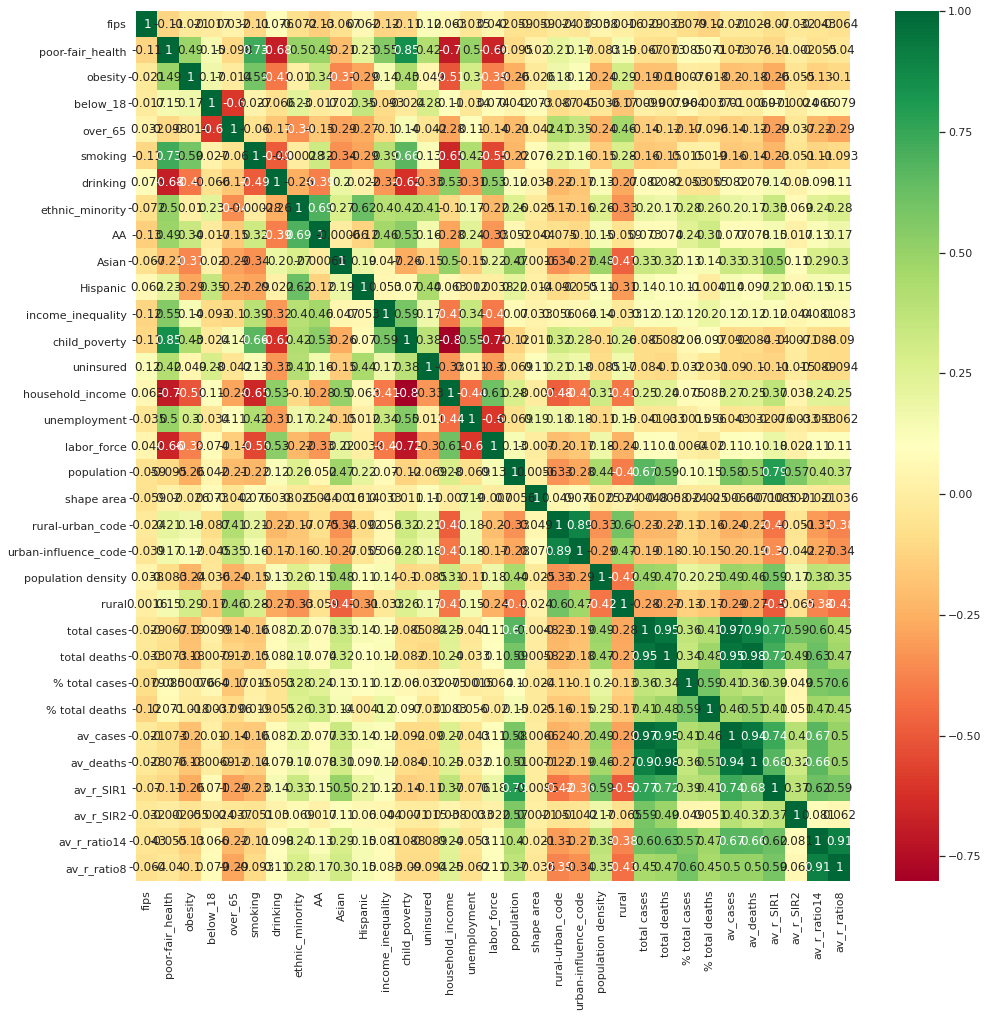

In [20]:
# Display a heatmap correlation matrix of all features
correlation_matrix = all_features_trim.corr('pearson')
plt.figure(figsize=(16,16))
correlation_matrix_display = sns.heatmap(correlation_matrix,annot=True,cmap="RdYlGn")
correlation_matrix_display

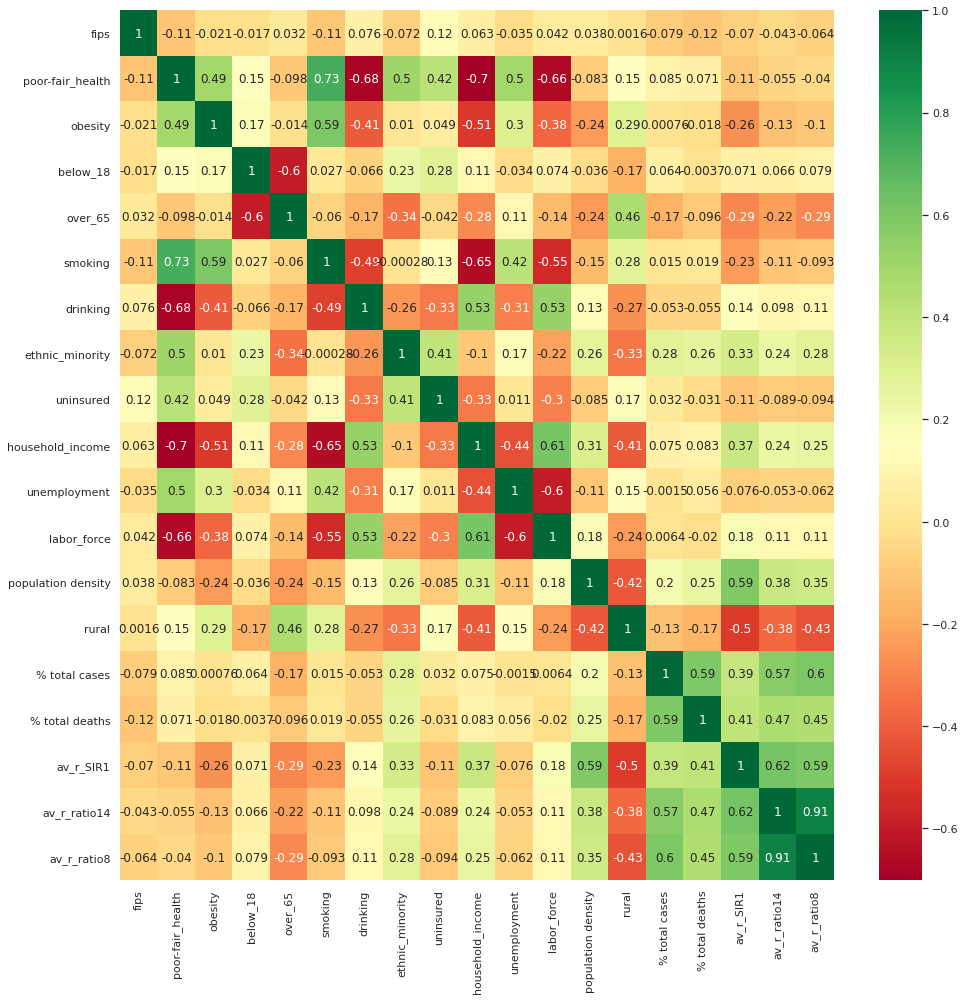

In [18]:
# Refine features further
modified_features = all_features_trim.copy().drop(['AA','Asian','Hispanic','income_inequality','child_poverty','population','shape area','total cases','total deaths','total cases','total deaths','av_cases','av_deaths','av_r_SIR2','rural-urban_code','urban-influence_code'],axis=1)
# Display a smaller correlation matrix
correlation_matrix = modified_features.corr('pearson')
plt.figure(figsize=(16,16))
correlation_matrix_display = sns.heatmap(correlation_matrix,annot=True,cmap="RdYlGn")
correlation_matrix_display

Display linear relationship pairplots

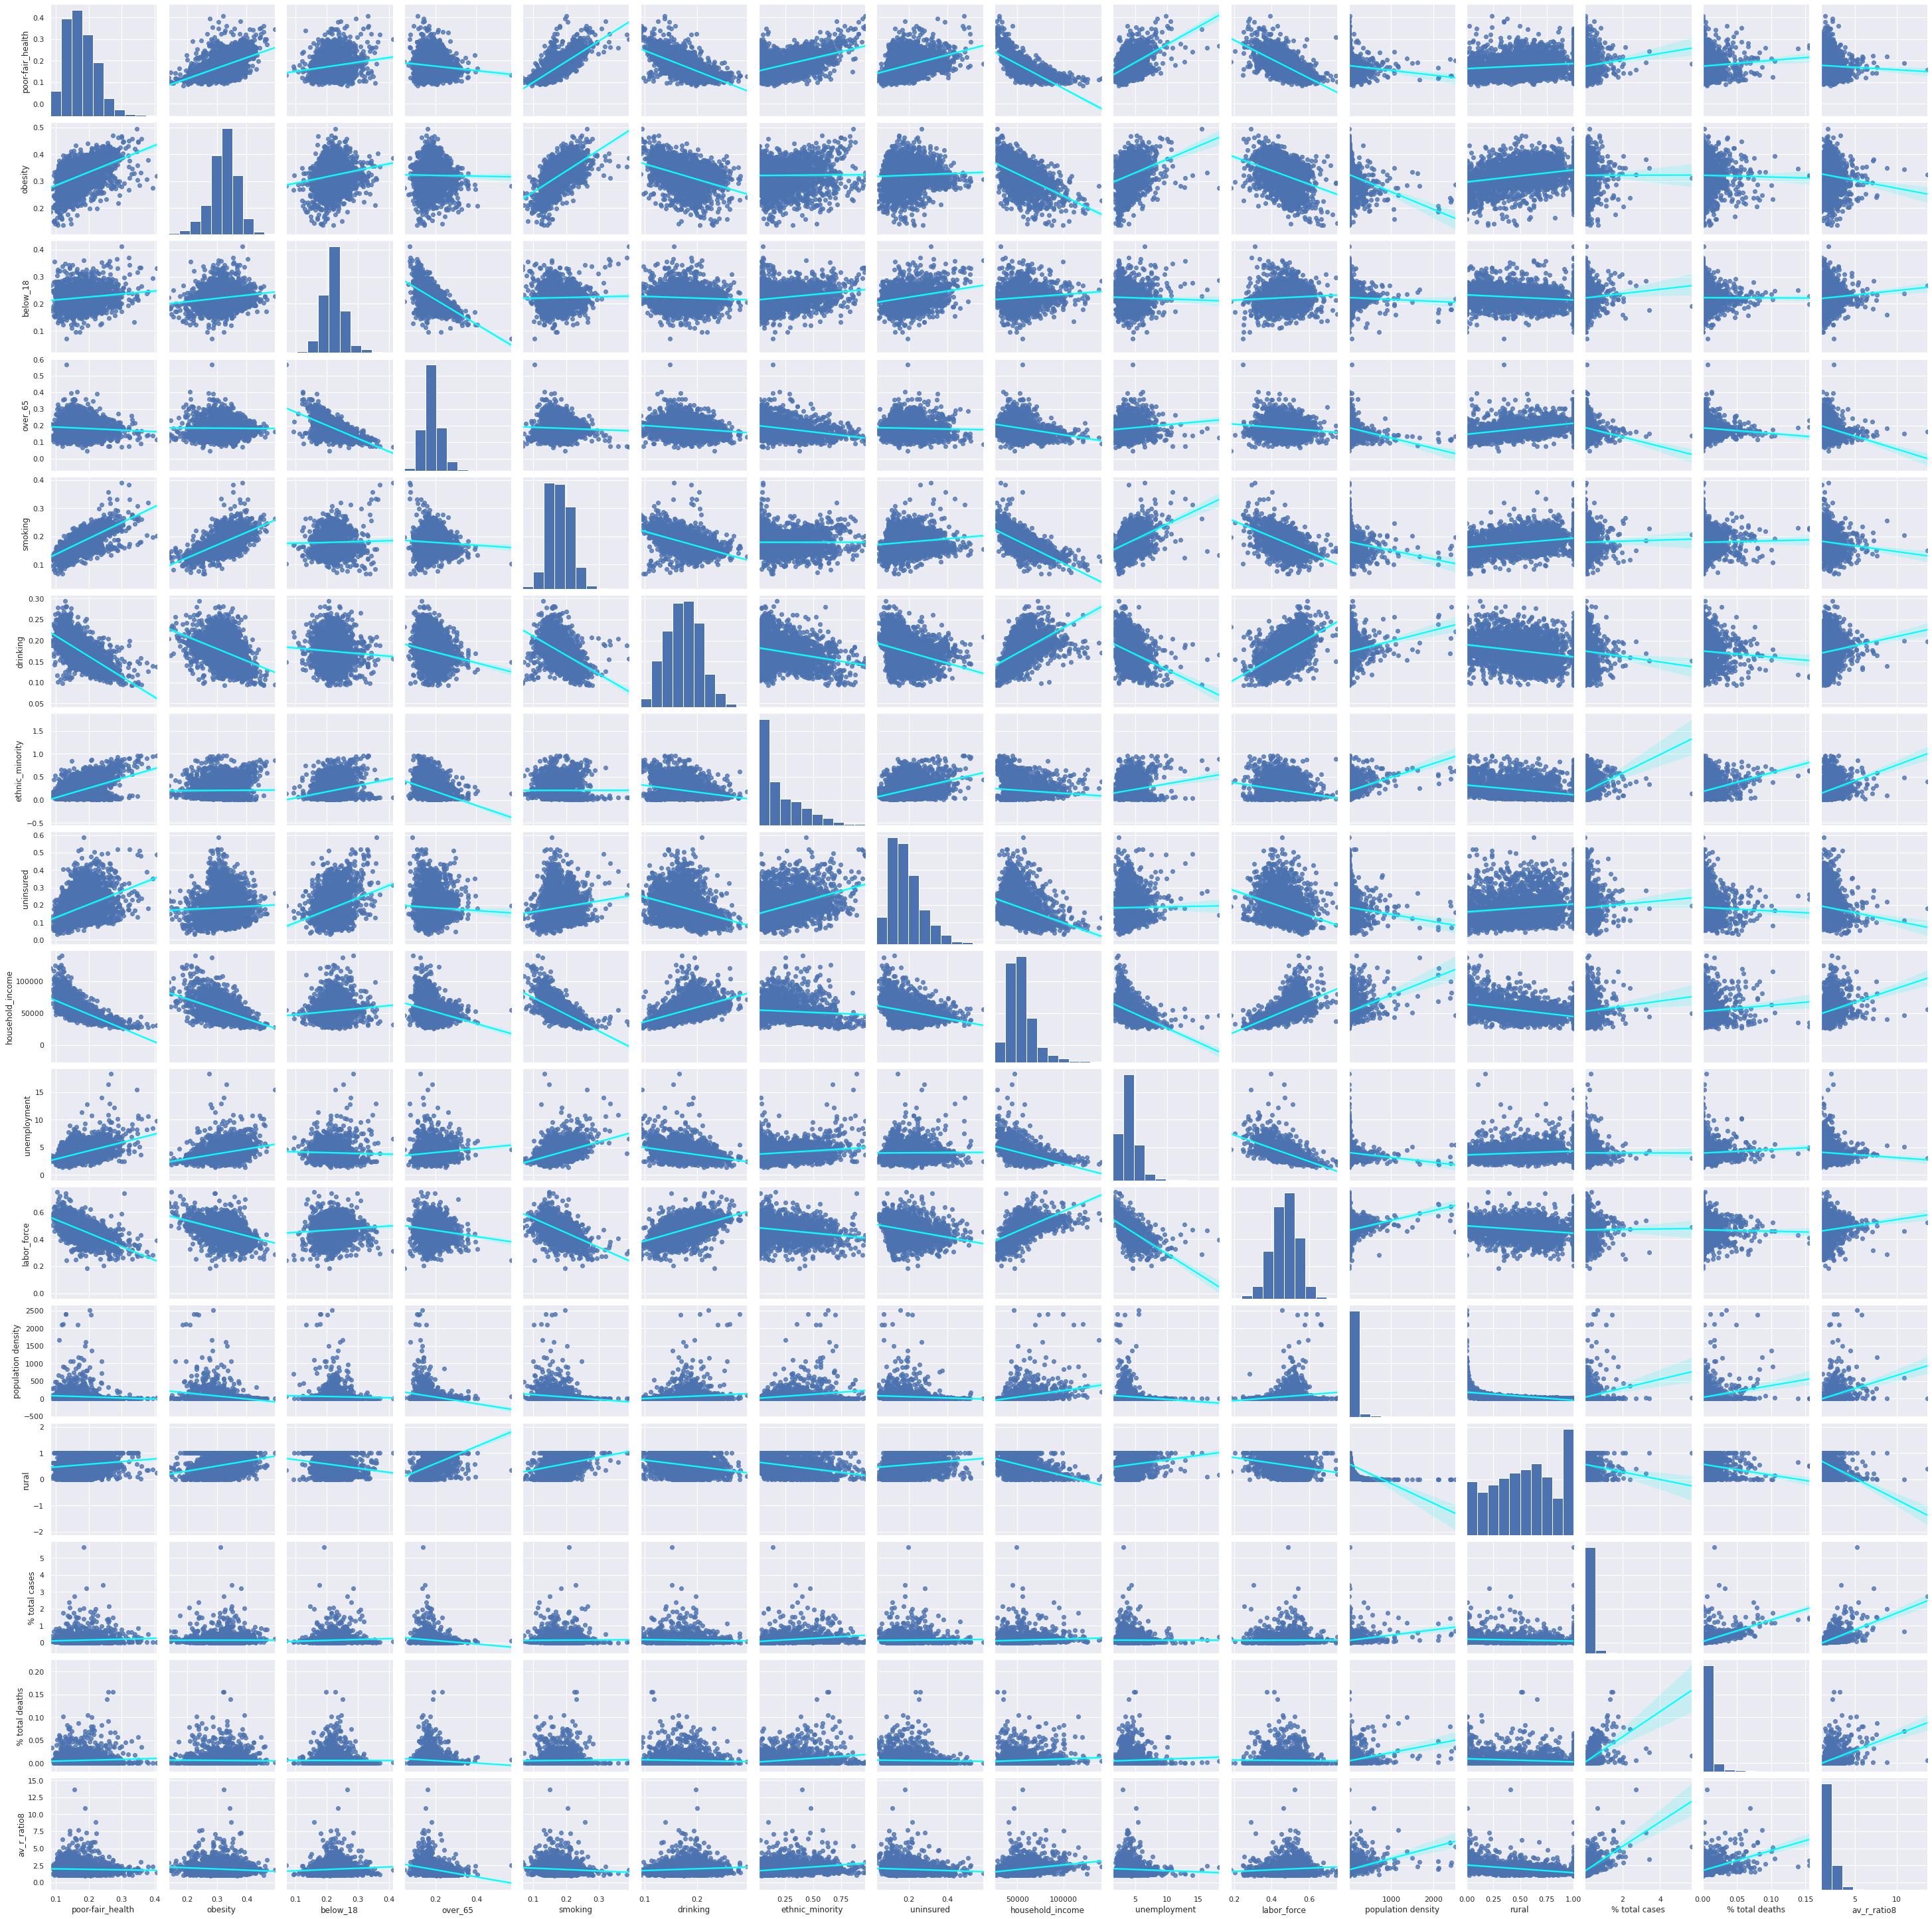

In [23]:
fixed_features = modified_features.drop(['fips','av_r_SIR1','av_r_ratio14'],axis=1)
sns.set(style="darkgrid")
sns.pairplot(fixed_features,kind='reg',plot_kws={'line_kws':{'color':'cyan'}})

Explore Health Relationships

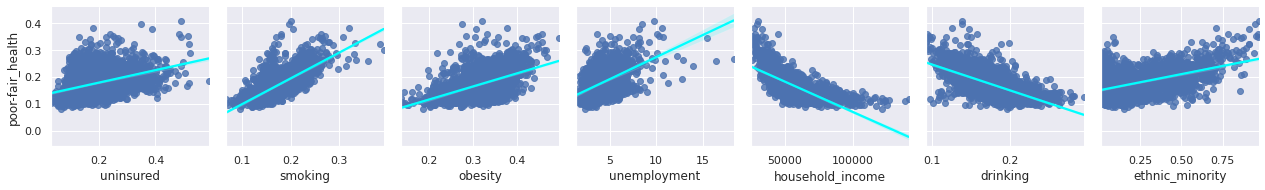

In [48]:
import seaborn as sns
sns.pairplot(fixed_features,y_vars=['poor-fair_health'],x_vars=['uninsured','smoking','obesity','unemployment','household_income','drinking','ethnic_minority'],kind='reg',plot_kws={'line_kws':{'color':'cyan'}})

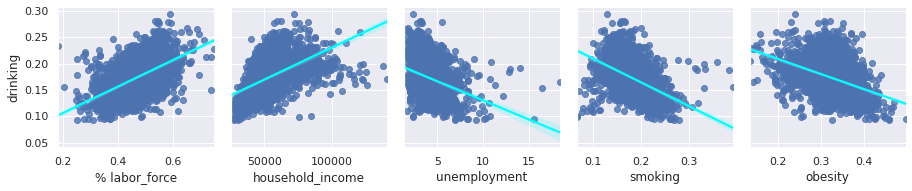

In [ ]:
sns.pairplot(fixed_features,y_vars=['drinking'],x_vars=['% labor_force','household_income','unemployment','smoking','obesity'],kind='reg',plot_kws={'line_kws':{'color':'cyan'}})

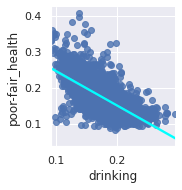

In [ ]:
sns.pairplot(fixed_features,y_vars=['poor-fair_health'],x_vars=['drinking'],kind='reg',plot_kws={'line_kws':{'color':'cyan'}})

Explore Ethnicity Relationships


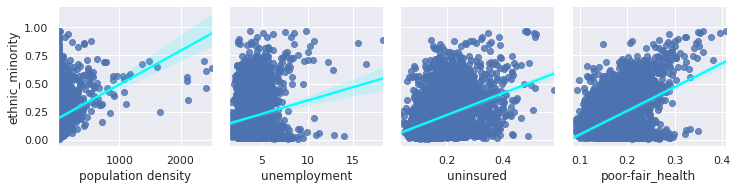

In [46]:
sns.pairplot(fixed_features,y_vars=['ethnic_minority'],x_vars=['population density','unemployment','uninsured','poor-fair_health'],kind='reg',plot_kws={'line_kws':{'color':'cyan'}})

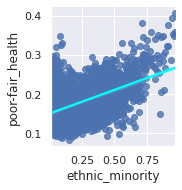

In [49]:
sns.pairplot(fixed_features,y_vars=['poor-fair_health'],x_vars=['ethnic_minority'],kind='reg',plot_kws={'line_kws':{'color':'cyan'}})

Explore R estimates

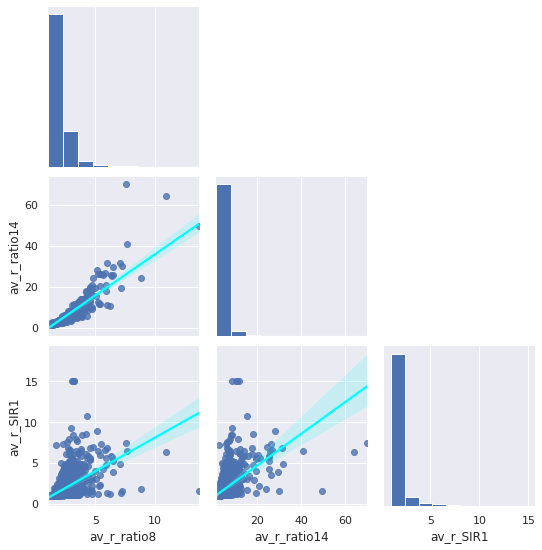

In [26]:
sns.pairplot(modified_features,y_vars=['av_r_ratio8','av_r_ratio14','av_r_SIR1'],x_vars=['av_r_ratio8','av_r_ratio14','av_r_SIR1'],kind='reg',plot_kws={'line_kws':{'color':'cyan'}},corner=True)

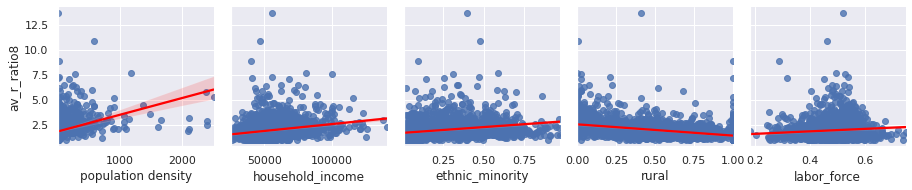

In [40]:
sns.pairplot(modified_features,y_vars=['av_r_ratio8'],x_vars=[...],kind='reg',plot_kws={'line_kws':{'color':'red'}})

Extract final features and produce final model input dataset

In [ ]:
# Clean and format final features
features_final = modified_features.drop(['av_r_SIR1','av_r_ratio8','av_r_ratio14'],axis=1)
modified_features_final = features_final.set_index('fips')
modified_features_final.head()

,poor-fair_health,obesity,below_18,over_65,smoking,drinking,Ethnic_Minority,uninsured,household_income,unemployment,% labor_force,rural-urban_code,urban-influence_code,population density,rural,% total cases,% total deaths
fips,,,,,,,,,,,,,,,,,
1001.0,0.184111,0.375,0.239370,0.151196,0.191247,0.168780,0.233911,0.134373,59338.0,2.7,0.468453,2.0,2.0,25.295462,0.420022,0.126423,0.003657
1003.0,0.180605,0.310,0.218485,0.199470,0.167955,0.167150,0.146599,0.168083,57588.0,2.7,0.435991,3.0,2.0,37.779782,0.422791,0.064328,0.001731
1005.0,0.257734,0.443,0.207638,0.188247,0.215409,0.126987,0.526118,0.194437,34382.0,3.8,0.345824,6.0,6.0,7.577262,0.677896,0.199367,0.001702
1007.0,0.199969,0.378,0.206061,0.160226,0.199164,0.159252,0.243162,0.149168,46064.0,3.1,0.387827,1.0,1.0,9.686033,0.683526,0.137110,0.001500
1009.0,0.210953,0.344,0.233499,0.178426,0.196522,0.153787,0.113268,0.189947,50412.0,2.7,0.438056,1.0,1.0,23.536137,0.899515,0.048041,0.000431


In [ ]:
# Combine with case date for final dataset
case_history_data_final = case_history_data.join(modified_features_final,on="fips",how="inner").set_index(['fips','date'])
case_history_data_final = case_history_data_final.drop('estimated_r_SIR2',axis=1)
case_history_data_final.head()

Unnamed: 0     county  ... % total cases  % total deaths
fips    date                               ...                              
53061.0 2020-01-21           0  Snohomish  ...      0.248276        0.010008
        2020-01-22           1  Snohomish  ...      0.248276        0.010008
        2020-01-23           2  Snohomish  ...      0.248276        0.010008
        2020-01-24           3  Snohomish  ...      0.248276        0.010008
        2020-01-25           4  Snohomish  ...      0.248276        0.010008

[5 rows x 26 columns]

In [ ]:
# Export all data
from google.colab import files

all_model_input_data = case_history_data_final.to_csv("all_model_input_data.csv")
files.download("all_model_input_data.csv")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>